# GRIP: The Spark Foundation

# TSF Task-1 : Prediction Using Supervised Learning.

# By- Rohit Kumar

### Import all required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score

In [3]:
# Read the Data from given Dataset
url = "http://bit.ly/w-data"
dataset = pd.read_csv(url)

In [5]:
dataset.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


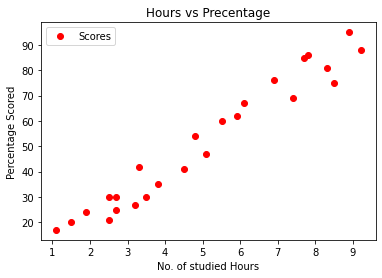

In [8]:
#Plotting the Graph of Hours vs Percentage
dataset.plot(x = 'Hours', y = 'Scores', style = 'or')
plt.title('Hours vs Precentage')
plt.xlabel('No. of studied Hours')
plt.ylabel('Percentage Scored')
plt.show()

### From the above Graph Reading, We found that Hours vs Percentage shows Positive linear Regression.

In [9]:
# Next Step is to divided the data into inputs and outputs
x = dataset.iloc[: ,:-1].values
y = dataset.iloc[: ,1].values

### Split the data into train and test data.

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                            test_size=0.2, random_state=0)

# Linear Regression

## Training the Algorithm

In [11]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

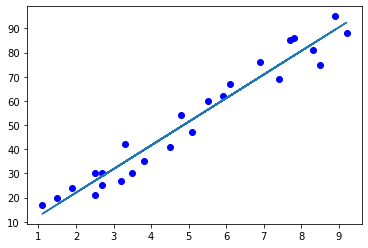

In [14]:
# Plotting Regression Line 
reg = LinearRegression().fit(x, y)
line = reg.coef_*x+reg.intercept_


# Plotting for the test data
plt.scatter(x, y, color = 'blue')
plt.plot(x, line);
plt.show()

## Making Predictions

### Now that we have trained our algorithm, it's time to make some prediction

In [15]:
# Testing data - In Hours
print(x_test)

# predicting the Scores
y_pred = regressor.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted Scores
df = pd.DataFrame({'Actual Percentage': y_test, 'Predicted Percentage': y_pred})
df

,Actual Percentage,Predicted Percentage
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### What will be predicted score if a student studies for 9.25 hrs/day?

In [18]:
hours = 9.25

# in order to get 2D arrays instead od scalar , we need to reshape the data
hours= np.array(hours).reshape(1,-1)
my_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(my_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538


## Evaluation the Model

In [20]:
print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print('R2 Score : ', r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
R2 Score :  0.9454906892105356
